## Libreria a utilizar

# Regresión lineal Simple

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Paso 1. Lectura del conjunto de datos procesado.

In [1]:

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv")

train_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


### Análisis univariante. Relación entre la variable predictora y la objetivo.

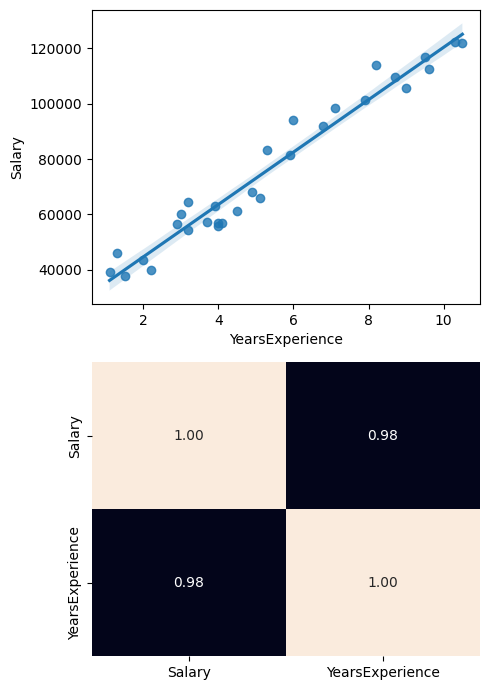

In [2]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = total_data, x = "YearsExperience", y = "Salary")
sns.heatmap(total_data[["Salary", "YearsExperience"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()


### Split Data Train y Test

In [3]:
X_train = train_data.drop(["Salary"], axis = 1)
y_train = train_data["Salary"]
X_test = test_data.drop(["Salary"], axis = 1)
y_test = test_data["Salary"]

## Paso 2: Inicialización y entrenamiento del modelo.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 26354.430697012212
Coeficientes (b): [9277.78307971]


## Paso 3: Predicción del modelo

In [7]:
y_pred = model.predict(X_test)
y_pred

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

In [9]:
test_data.head()

,YearsExperience,Salary
0,1.5,37731.0
1,3.0,60150.0
2,4.5,61111.0
3,6.8,91738.0
4,8.2,113812.0


### Para comparar el valor predicho del original, podemos fácilmente realizar un gráfico comparativo como el siguiente:

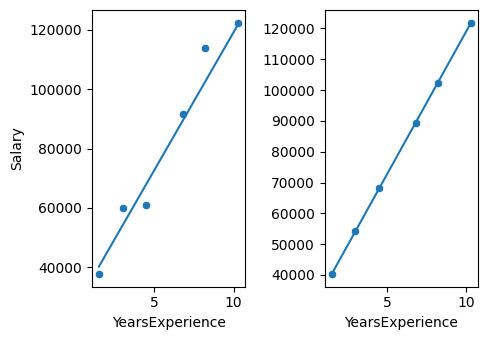

In [8]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los gráficos
regression_equation = lambda x: 26354.43069701219 + 9277.78307971 * x

sns.scatterplot(ax = axis[0], data = test_data, x = "YearsExperience", y = "Salary")
sns.lineplot(ax = axis[0], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"]))
sns.scatterplot(ax = axis[1], x = test_data["YearsExperience"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"])).set(ylabel = None)

plt.tight_layout()

plt.show()

### Para calcular la efectividad del modelo utilizaremos el error cuadrático medio (MSE) y el coeficiente de determinación (R cuadrado), unas de las métricas más populares.

In [11]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 37649779.45133659
Coeficiente de determinación: 0.959714925174946


## Paso 4: Optimización de resultados
Este tipo de modelos no se pueden optimizar, debido a la ausencia de hiperparámetros.

# Regresión lineal múltiple

## Paso 1. Lectura del conjunto de datos procesado

In [12]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_test.csv")

train_data.head()

,Gender,Height,Weight
0,-1.0,-0.575639,151.275533
1,-1.0,-0.992843,123.965162
2,-1.0,-0.925964,124.765438
3,-1.0,-1.478210,119.195698
4,1.0,-1.598649,146.956646


### Análisis univariante. Diagrama de puntos se visualizará la relación entre las variables predictoras y la variable objetivo.

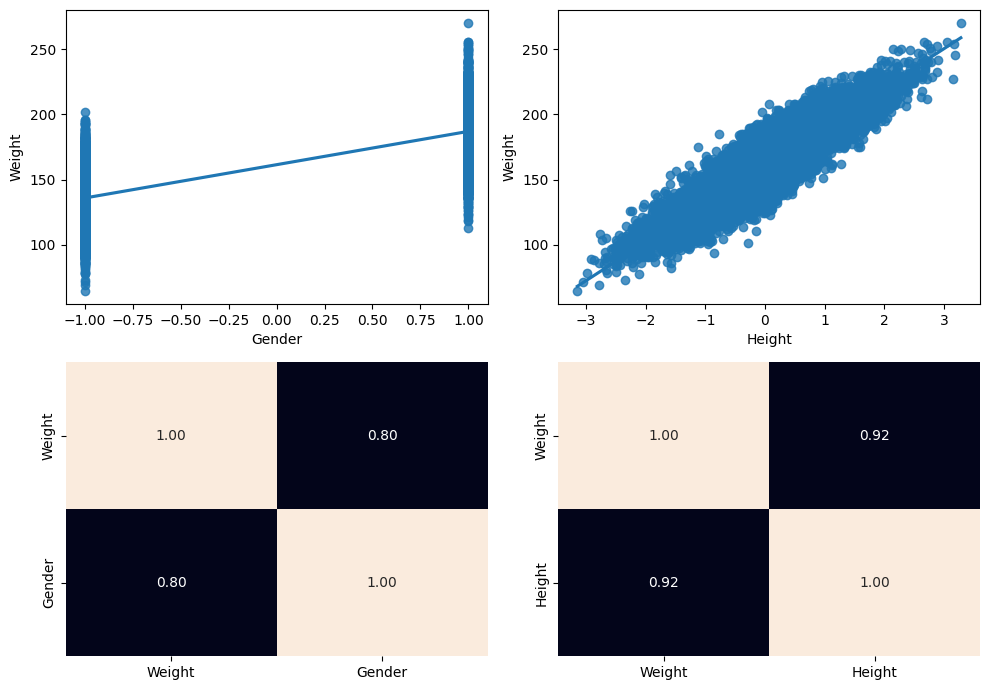

In [13]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "Gender", y = "Weight")
sns.heatmap(total_data[["Weight", "Gender"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Height", y = "Weight")
sns.heatmap(total_data[["Weight", "Height"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

### Split Data Train y Test

In [14]:
X_train = train_data.drop(["Weight"], axis = 1)
y_train = train_data["Weight"]
X_test = test_data.drop(["Weight"], axis = 1)
y_test = test_data["Weight"]

## Paso 2: Inicialización y entrenamiento del modelo

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 161.48606316160345
Coeficientes (b1, b2): [ 9.65020608 22.88377295]


## Paso 3: Predicción del modelo

In [17]:
y_pred = model.predict(X_test)
y_pred

array([105.17851056, 188.29501423, 137.05824216, ..., 112.17172027,
       130.89667195, 137.46475059])

In [19]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 98.21235363443179
Coeficiente de determinación: 0.9075866115171991


## Paso 4: Optimización de resultados
Este tipo de modelos no se pueden optimizar, debido a la ausencia de hiperparámetros.